In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

'''if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")'''

'if not sys.warnoptions:\n    import warnings\n    warnings.simplefilter("ignore")'

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Training",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [9]:
len(dataset)

102

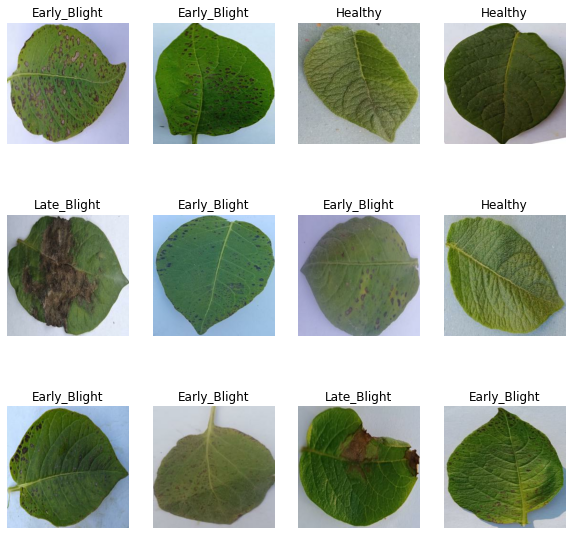

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [11]:
train_size = 0.8
len(dataset)*train_size

81.60000000000001

In [12]:
train_ds = dataset.take(81)
test_ds=dataset.skip(81)

In [13]:
len(test_ds)

21

In [14]:
val_ds = 0.1
val_ds=int(len(dataset)*val_ds)
val_ds

10

In [15]:

test_ds = test_ds.skip(10)
len(test_ds)

11

In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1,shuffle = True,shuffle_size=1000):
    ds_size = len(ds)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    test_size = int(test_split*ds_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds
    
    

In [17]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

81

In [19]:
len(test_ds)

11

In [20]:
len(val_ds)

10

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)


In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=16,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
81/81 [==============================] - 152s 2s/step - loss: 1.1225 - accuracy: 0.5154 - val_loss: 1.1237 - val_accuracy: 0.5375
Epoch 2/50
81/81 [==============================] - 144s 2s/step - loss: 0.8326 - accuracy: 0.6370 - val_loss: 0.7840 - val_accuracy: 0.6625
Epoch 3/50
81/81 [==============================] - 151s 2s/step - loss: 0.6586 - accuracy: 0.7284 - val_loss: 0.5446 - val_accuracy: 0.7969
Epoch 4/50
81/81 [==============================] - 148s 2s/step - loss: 0.5542 - accuracy: 0.7782 - val_loss: 0.5940 - val_accuracy: 0.7375
Epoch 5/50
81/81 [==============================] - 146s 2s/step - loss: 0.4663 - accuracy: 0.8260 - val_loss: 0.4569 - val_accuracy: 0.8281
Epoch 6/50
81/81 [==============================] - 206s 3s/step - loss: 0.4292 - accuracy: 0.8449 - val_loss: 0.4643 - val_accuracy: 0.7969
Epoch 7/50
81/81 [==============================] - 180s 2s/step - loss: 0.3982 - accuracy: 0.8453 - val_loss: 0.3527 - val_accuracy: 0.8656
Epoch 8/50
81

In [28]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 7s 337ms/step - loss: 0.0269 - accuracy: 0.9971


In [29]:
scores

[0.02685772255063057, 0.9970501661300659]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 81}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
len(history.history['loss'])

50

In [34]:
history.history['loss'][0:5]

[1.1224843263626099,
 0.8326300382614136,
 0.6585916876792908,
 0.554186999797821,
 0.466346800327301]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

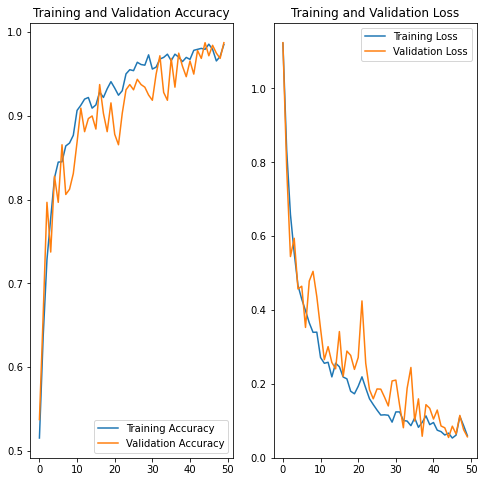

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Early_Blight
1/1 [==============================] - 1s 663ms/step
predicted label: Early_Blight


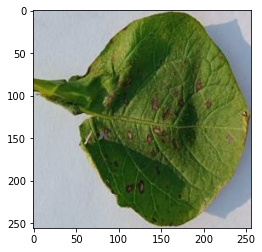

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


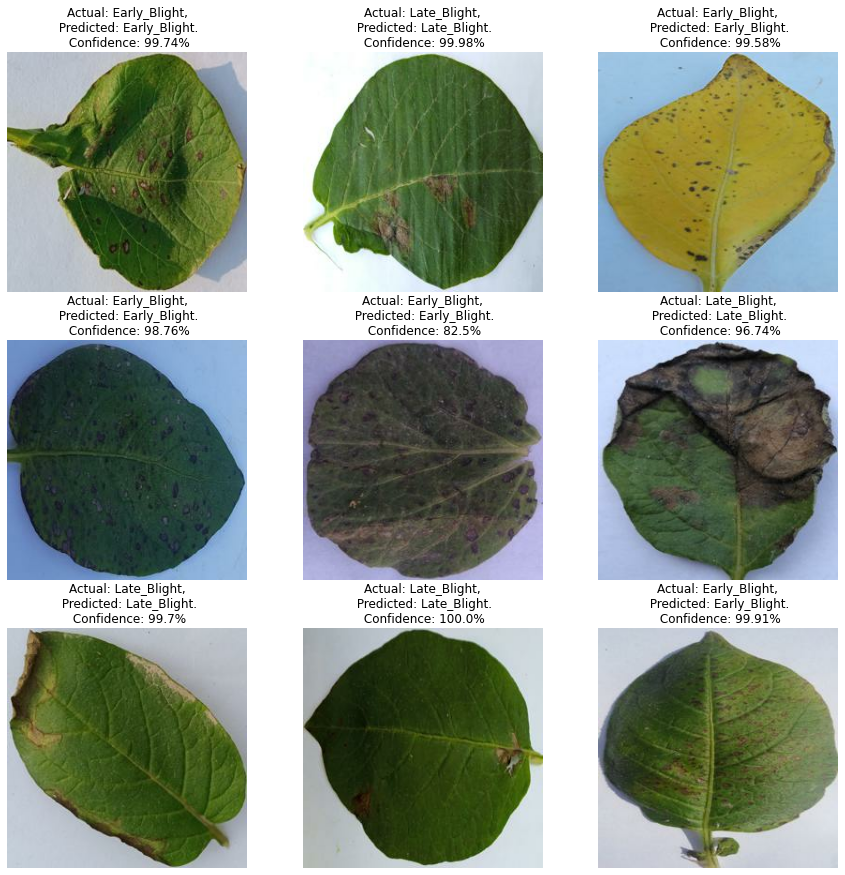

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [40]:
import os
model_version=max([int(i) for i in os.listdir("./model") + [0]])+1
model.save(f"./model/{model_version}")

INFO:tensorflow:Assets written to: ./model/2\assets


INFO:tensorflow:Assets written to: ./model/2\assets


In [41]:
model.save("./potatoes.h5")